In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML

,Unnamed: 0,X,y
count,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.005000,30.852884
std,1154.844867,11.548449,32.525128
min,0.000000,-20.000000,-150.000000
25%,999.750000,-10.002500,11.520831
50%,1999.500000,-0.005000,31.300053
75%,2999.250000,9.992500,52.339514
max,3999.000000,19.990000,128.782166


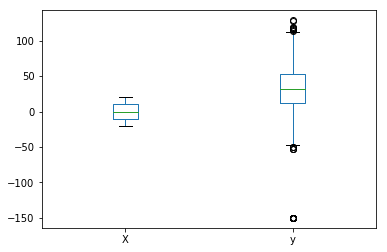

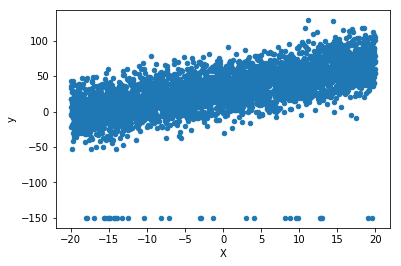

In [2]:
# Analisis preliminar de datos

df=pd.read_csv('laboratorio_aguas.csv')

display(HTML(df.describe().to_html()))
df[['X','y']].plot.box()
df.plot.scatter(x='X',y='y')

#plt.savefig('scatter.pdf',format='pdf')

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# split training and text data
X=df.as_matrix(['X'])
y=df.as_matrix(['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4200)



/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [4]:
 #Create linear regression object
regr = linear_model.LinearRegression()
#testing other linear alorithms
# regr=linear_model.Ridge(alpha=.1)

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients: 
 [[1.84952696]]
Intercept:  [30.99856303]


regressor score                |      0.41
Mean squared error             |    533.05
mean_squared_error             |    533.05
mean_absolute_error            |     16.05
median_absolute_error          |     12.52
explained_variance_score       |      0.41
r ^ 2 score                    |      0.41


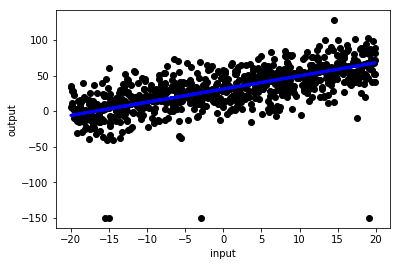

In [5]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


def test_model(X_test,y_test,regr):
  #prediction
  y_pred=regr.predict(X_test)
  ##graficas

  plt.scatter(X_test, y_test,  color='black')
  plt.plot(X_test, regr.predict(X_test), color='blue',linewidth=3)
  plt.xlabel('input')
  plt.ylabel('output')


  # https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
  print('{0:30} | {1:9.2f}'.format('regressor score', regr.score(X_test,y_test)))
  print('{0:30} | {1:9.2f}'.format('Mean squared error', np.mean((y_pred - y_test) ** 2)))
  print('{0:30} | {1:9.2f}'.format('mean_squared_error', mean_squared_error(y_test,y_pred)))
  #print('{0:30} | {1:9.2f}'.format('mean_squared_log_error', mean_squared_log_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('mean_absolute_error', mean_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('median_absolute_error', median_absolute_error(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('explained_variance_score', explained_variance_score(y_test,y_pred)))
  print('{0:30} | {1:9.2f}'.format('r ^ 2 score', r2_score(y_test,y_pred)))
    
test_model (X_test, y_test, regr)



In [8]:
#saving the model (just one time after training)
import pickle #for save the model

name_file='lineardiabetes.pkl'
myfile = open(name_file, 'wb')
pickle.dump(regr,myfile)
myfile.close()



In [9]:
import pickle #for save the model
def conversor(x,model_file):
  # load the model with the trained model 
  ## example, this function can be a web server in django 
  new_file = open(model_file, 'rb')
  clf2 = pickle.load(new_file)
  return clf2.predict(x)


# after this point a lot of data engineering would be required...

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score


regressors = [linear_model.LinearRegression(),linear_model.Ridge(alpha=.7),MLPRegressor(hidden_layer_sizes=(22,100,),activation='relu',max_iter=100000),linear_model.RANSACRegressor(random_state=0)]
names = ['lineal','ridge 0.7','MLP','RANSAC']
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['explained_variance',
          'neg_mean_absolute_error',
          'neg_mean_squared_error',
          'neg_mean_squared_log_error',
          'neg_median_absolute_error',
          'r2']



for reg,name in zip(regressors,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[5],
                            cv=5)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[5]))
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:23.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))

--------------------------------------
model lineal               | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model ridge 0.7            | score r2                  
mean                   0.42| std   0.06                  
Accuracy(95.7%):                    0.42 (+/- 0.12)
--------------------------------------
model MLP                  | score r2                  
mean                   0.41| std   0.06                  
Accuracy(95.7%):                    0.41 (+/- 0.12)
--------------------------------------
model RANSAC               | score r2                  
mean                   0.39| std   0.07                  
Accuracy(95.7%):                    0.39 (+/- 0.14)


regressor score                |      0.42
Mean squared error             |   1344.38
mean_squared_error             |    531.30
mean_absolute_error            |     16.00
median_absolute_error          |     12.36
explained_variance_score       |      0.42
r ^ 2 score                    |      0.42


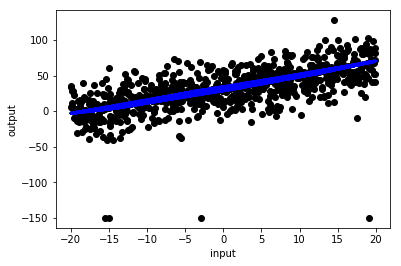

In [11]:
#after this point repeat test and implementation process whith the best model.
model=regressors[2].fit(X_train,y_train.ravel())
test_model(X_test,y_test,model)

In [12]:

print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause

import pandas
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
#diabetes = datasets.load_diabetes()
#diabetes['feature_names'].append('Y')
#data=pandas.DataFrame(data= np.c_[diabetes['data'], diabetes['target']],columns= diabetes['feature_names'])
#descripcion=data.describe()
#print(descripcion)

data = pandas.read_csv('diabetes.data.txt',sep='\t')
descripcion=data.describe()
display(HTML(data.describe().to_html()))

Automatically created module for IPython interactive environment


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [43]:
'''
BMI
'''
%matplotlib inline
import pickle #for save the model
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.cross_validation import train_test_split
# de acuerdo a la version scikit train_test_split puede ser
from sklearn.model_selection import train_test_split ,cross_val_score


diabetes_X = data.as_matrix(['BMI'])
diabetes_Y =data['Y']

def process (dtX,dtY,testSize=0.30,graph=True):
    
    x_train,x_test,y_train,y_test = train_test_split(dtX,dtY,test_size=testSize,random_state=5000)
    
    mreg = linear_model.LinearRegression()

    mreg.fit(x_train,y_train)

/Users/ronaldmorales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [44]:
#train

mreg.fit(x_train,y_train)

coef = mreg.coef_
inter = mreg.intercept_
print ('Coeficiente',coef)
print ('Intercepto',inter)

y_pred = mreg.predcit(x_test)

print ("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print ("r^2: %2f" % r2_score(y_test,y_pred))

scoring = ['neg_mean_squared_error','r2']
scores = cross_val_score(mreg,x_train,y_train,scoring=scoring[1],cv=5)
print ("r^2 k-fold=5: ",scores)
maxr2 = scores.max()
print ("r^2 best: %2.f" % maxr2)

if grafica == True:
    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test,y_pred, color='blue', linewidth=3)
    plt.show()
    
    plt.scatter(x_train,y_train, color='black')
    plt.plot(x_test,y_pred, color='red', linewidth=3)
    plt.show()
    
return maxr2

print('\nModelo para BMI')
process(diabetes_X,diabetes_Y,0.30)




NameError: name 'x_train' is not defined